# Introduction

This notebook shows the time series analysis of crime rate and new building development per LGA.

In [82]:
library(magrittr)
library(Hmisc)
library(tidyverse)
library(Hmisc)
library(corrr)
library(ggfortify)
library(MASS)

In [42]:
data_path <- "D:/OneDrive - UTS/36103/AT2B/EDA"
output_path <- "D:/OneDrive - UTS/36103/AT2B/data2"

# Loading `lga_name_mapping` Data

In [4]:
data_df <- readr::read_csv(paste(data_path, "lga_name_mapping.csv", sep = "/"))
lga_name_mapping_df <- data_df
head(lga_name_mapping_df)
glimpse(lga_name_mapping_df)

Parsed with column specification:
cols(
  lga_code = col_double(),
  lga_clean = col_character(),
  lga_paren = col_character()
)


lga_code,lga_clean,lga_paren
10050,Albury,Albury (C)
10130,Armidale Regional,Armidale Regional (A)
10250,Ballina,Ballina (A)
10300,Balranald,Balranald (A)
10470,Bathurst Regional,Bathurst Regional (A)
10500,Bayside,Bayside (A)


Observations: 131
Variables: 3
$ lga_code  <dbl> 10050, 10130, 10250, 10300, 10470, 10500, 10550, 10600, 1...
$ lga_clean <chr> "Albury", "Armidale Regional", "Ballina", "Balranald", "B...
$ lga_paren <chr> "Albury (C)", "Armidale Regional (A)", "Ballina (A)", "Ba...


# Loading `crime` Data

In [5]:
data_df <- readr::read_csv(paste(data_path, "crime_1995_2018_by_month.csv", sep = "/"))
crime_df <- data_df
head(crime_df)

Parsed with column specification:
cols(
  .default = col_double(),
  LGA = col_character(),
  `Offence category` = col_character(),
  Subcategory = col_character()
)
See spec(...) for full column specifications.


LGA,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,...,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
Albury,Homicide,Murder *,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Albury,Homicide,Attempted murder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albury,Homicide,"Murder accessory, conspiracy",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albury,Homicide,Manslaughter *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albury,Assault,Domestic violence related assault,7,7,7,2,7,6,4,...,22,32,30,24,16,17,16,27,18,29
Albury,Assault,Non-domestic violence related assault,29,20,21,16,24,20,14,...,29,21,36,31,21,23,29,29,28,37


In [6]:
crime_df %<>% 
    gather(key = "date", value = "crime_count", "Jan 1995":"Dec 2018")

head(crime_df)
glimpse(crime_df)

LGA,Offence category,Subcategory,date,crime_count
Albury,Homicide,Murder *,Jan 1995,0
Albury,Homicide,Attempted murder,Jan 1995,0
Albury,Homicide,"Murder accessory, conspiracy",Jan 1995,0
Albury,Homicide,Manslaughter *,Jan 1995,0
Albury,Assault,Domestic violence related assault,Jan 1995,7
Albury,Assault,Non-domestic violence related assault,Jan 1995,29


Observations: 2,339,136
Variables: 5
$ LGA                <chr> "Albury", "Albury", "Albury", "Albury", "Albury"...
$ `Offence category` <chr> "Homicide", "Homicide", "Homicide", "Homicide", ...
$ Subcategory        <chr> "Murder *", "Attempted murder", "Murder accessor...
$ date               <chr> "Jan 1995", "Jan 1995", "Jan 1995", "Jan 1995", ...
$ crime_count        <dbl> 0, 0, 0, 0, 7, 29, 12, 4, 2, 0, 0, 0, 1, 0, 0, 1...


In [7]:
crime_df %<>%
    separate(date, c("month", "year"))

head(crime_df)
glimpse(crime_df)

LGA,Offence category,Subcategory,month,year,crime_count
Albury,Homicide,Murder *,Jan,1995,0
Albury,Homicide,Attempted murder,Jan,1995,0
Albury,Homicide,"Murder accessory, conspiracy",Jan,1995,0
Albury,Homicide,Manslaughter *,Jan,1995,0
Albury,Assault,Domestic violence related assault,Jan,1995,7
Albury,Assault,Non-domestic violence related assault,Jan,1995,29


Observations: 2,339,136
Variables: 6
$ LGA                <chr> "Albury", "Albury", "Albury", "Albury", "Albury"...
$ `Offence category` <chr> "Homicide", "Homicide", "Homicide", "Homicide", ...
$ Subcategory        <chr> "Murder *", "Attempted murder", "Murder accessor...
$ month              <chr> "Jan", "Jan", "Jan", "Jan", "Jan", "Jan", "Jan",...
$ year               <chr> "1995", "1995", "1995", "1995", "1995", "1995", ...
$ crime_count        <dbl> 0, 0, 0, 0, 7, 29, 12, 4, 2, 0, 0, 0, 1, 0, 0, 1...


In [8]:
crime_df %<>%
    rename(lga = LGA)

head(crime_df)
glimpse(crime_df)

lga,Offence category,Subcategory,month,year,crime_count
Albury,Homicide,Murder *,Jan,1995,0
Albury,Homicide,Attempted murder,Jan,1995,0
Albury,Homicide,"Murder accessory, conspiracy",Jan,1995,0
Albury,Homicide,Manslaughter *,Jan,1995,0
Albury,Assault,Domestic violence related assault,Jan,1995,7
Albury,Assault,Non-domestic violence related assault,Jan,1995,29


Observations: 2,339,136
Variables: 6
$ lga                <chr> "Albury", "Albury", "Albury", "Albury", "Albury"...
$ `Offence category` <chr> "Homicide", "Homicide", "Homicide", "Homicide", ...
$ Subcategory        <chr> "Murder *", "Attempted murder", "Murder accessor...
$ month              <chr> "Jan", "Jan", "Jan", "Jan", "Jan", "Jan", "Jan",...
$ year               <chr> "1995", "1995", "1995", "1995", "1995", "1995", ...
$ crime_count        <dbl> 0, 0, 0, 0, 7, 29, 12, 4, 2, 0, 0, 0, 1, 0, 0, 1...


In [9]:
crime_df %<>%
    mutate(date = paste(year, month, "01", sep = "-")) %>%
    mutate(date = as.Date(date, format = "%Y-%b-%d")) %>%
    arrange(date) %>%
    rename(crime_type = `Offence category`)

head(crime_df)
glimpse(crime_df)

lga,crime_type,Subcategory,month,year,crime_count,date
Albury,Homicide,Murder *,Jan,1995,0,1995-01-01
Albury,Homicide,Attempted murder,Jan,1995,0,1995-01-01
Albury,Homicide,"Murder accessory, conspiracy",Jan,1995,0,1995-01-01
Albury,Homicide,Manslaughter *,Jan,1995,0,1995-01-01
Albury,Assault,Domestic violence related assault,Jan,1995,7,1995-01-01
Albury,Assault,Non-domestic violence related assault,Jan,1995,29,1995-01-01


Observations: 2,339,136
Variables: 7
$ lga         <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albu...
$ crime_type  <chr> "Homicide", "Homicide", "Homicide", "Homicide", "Assaul...
$ Subcategory <chr> "Murder *", "Attempted murder", "Murder accessory, cons...
$ month       <chr> "Jan", "Jan", "Jan", "Jan", "Jan", "Jan", "Jan", "Jan",...
$ year        <chr> "1995", "1995", "1995", "1995", "1995", "1995", "1995",...
$ crime_count <dbl> 0, 0, 0, 0, 7, 29, 12, 4, 2, 0, 0, 0, 1, 0, 0, 1, 35, 3...
$ date        <date> 1995-01-01, 1995-01-01, 1995-01-01, 1995-01-01, 1995-0...


## Aggregating the crime count to an LGA level

In [10]:
crime_agg_df <- crime_df %>%
    group_by(lga, date) %>%
    summarise(total_crime_count = sum(crime_count)) %>%
    ungroup %>%
    mutate(year = as.integer(format(date, "%Y")))

head(crime_agg_df)
glimpse(crime_agg_df)

lga,date,total_crime_count,year
Albury,1995-01-01,486,1995
Albury,1995-02-01,367,1995
Albury,1995-03-01,336,1995
Albury,1995-04-01,385,1995
Albury,1995-05-01,378,1995
Albury,1995-06-01,423,1995


Observations: 37,728
Variables: 4
$ lga               <chr> "Albury", "Albury", "Albury", "Albury", "Albury",...
$ date              <date> 1995-01-01, 1995-02-01, 1995-03-01, 1995-04-01, ...
$ total_crime_count <dbl> 486, 367, 336, 385, 378, 423, 404, 362, 349, 371,...
$ year              <int> 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1...


## Aggregating the crime count to yearly

In [11]:
crime_agg_year_lga_df <- crime_agg_df %>%
    group_by(lga, year) %>%
    summarise(total_crime_count = sum(total_crime_count)) %>%
    ungroup

head(crime_agg_year_lga_df)
glimpse(crime_agg_year_lga_df)

lga,year,total_crime_count
Albury,1995,4610
Albury,1996,5135
Albury,1997,5251
Albury,1998,5190
Albury,1999,5251
Albury,2000,6174


Observations: 3,144
Variables: 3
$ lga               <chr> "Albury", "Albury", "Albury", "Albury", "Albury",...
$ year              <int> 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2...
$ total_crime_count <dbl> 4610, 5135, 5251, 5190, 5251, 6174, 6801, 7032, 7...


# Loading the `erp` data

In [12]:
data_df <- readr::read_csv(paste(data_path, "erp.csv", sep = "/"))
erp_df <- data_df
head(erp_df)
glimpse(erp_df)

Parsed with column specification:
cols(
  Sex = col_character(),
  Age = col_character(),
  LGA_2017 = col_double(),
  Region = col_character(),
  Time = col_double(),
  Value = col_double()
)


Sex,Age,LGA_2017,Region,Time,Value
Males,0 - 4,10050,Albury (C),2001,1590
Males,0 - 4,10050,Albury (C),2002,1547
Males,0 - 4,10050,Albury (C),2003,1526
Males,0 - 4,10050,Albury (C),2004,1525
Males,0 - 4,10050,Albury (C),2005,1547
Males,0 - 4,10050,Albury (C),2006,1572


Observations: 80,172
Variables: 6
$ Sex      <chr> "Males", "Males", "Males", "Males", "Males", "Males", "Mal...
$ Age      <chr> "0 - 4", "0 - 4", "0 - 4", "0 - 4", "0 - 4", "0 - 4", "0 -...
$ LGA_2017 <dbl> 10050, 10050, 10050, 10050, 10050, 10050, 10050, 10050, 10...
$ Region   <chr> "Albury (C)", "Albury (C)", "Albury (C)", "Albury (C)", "A...
$ Time     <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010...
$ Value    <dbl> 1590, 1547, 1526, 1525, 1547, 1572, 1621, 1651, 1694, 1694...


In [13]:
erp_df %<>%
    left_join(lga_name_mapping_df, by = c("LGA_2017" = "lga_code")) %>%
    select(lga_clean, Sex, Age, Time, Value) %>%
    rename(lga = lga_clean, sex = Sex, age_group = Age, year = Time, erp = Value)

head(erp_df)
glimpse(erp_df)

lga,sex,age_group,year,erp
Albury,Males,0 - 4,2001,1590
Albury,Males,0 - 4,2002,1547
Albury,Males,0 - 4,2003,1526
Albury,Males,0 - 4,2004,1525
Albury,Males,0 - 4,2005,1547
Albury,Males,0 - 4,2006,1572


Observations: 80,172
Variables: 5
$ lga       <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albury...
$ sex       <chr> "Males", "Males", "Males", "Males", "Males", "Males", "Ma...
$ age_group <chr> "0 - 4", "0 - 4", "0 - 4", "0 - 4", "0 - 4", "0 - 4", "0 ...
$ year      <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...
$ erp       <dbl> 1590, 1547, 1526, 1525, 1547, 1572, 1621, 1651, 1694, 169...


In [14]:
erp_df %<>%
    mutate(sex = as.factor(sex),
           age_group = as.factor(age_group),
           erp = as.integer(erp))

head(erp_df)
glimpse(erp_df)

lga,sex,age_group,year,erp
Albury,Males,0 - 4,2001,1590
Albury,Males,0 - 4,2002,1547
Albury,Males,0 - 4,2003,1526
Albury,Males,0 - 4,2004,1525
Albury,Males,0 - 4,2005,1547
Albury,Males,0 - 4,2006,1572


Observations: 80,172
Variables: 5
$ lga       <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albury...
$ sex       <fct> Males, Males, Males, Males, Males, Males, Males, Males, M...
$ age_group <fct> 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0...
$ year      <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...
$ erp       <int> 1590, 1547, 1526, 1525, 1547, 1572, 1621, 1651, 1694, 169...


## Adding per lga per year

In [15]:
erp_df %<>%
    group_by(lga, year) %>%
    mutate(erp_lga_year = sum(erp))

head(erp_df)
glimpse(erp_df)

lga,sex,age_group,year,erp,erp_lga_year
Albury,Males,0 - 4,2001,1590,45265
Albury,Males,0 - 4,2002,1547,45816
Albury,Males,0 - 4,2003,1526,46180
Albury,Males,0 - 4,2004,1525,46505
Albury,Males,0 - 4,2005,1547,47004
Albury,Males,0 - 4,2006,1572,47566


Observations: 80,172
Variables: 6
Groups: lga, year [2,227]
$ lga          <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Alb...
$ sex          <fct> Males, Males, Males, Males, Males, Males, Males, Males...
$ age_group    <fct> 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4...
$ year         <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, ...
$ erp          <int> 1590, 1547, 1526, 1525, 1547, 1572, 1621, 1651, 1694, ...
$ erp_lga_year <int> 45265, 45816, 46180, 46505, 47004, 47566, 48140, 48518...


## Aggregating to per lga per year

In [16]:
erp_agg_df <- erp_df %>%
    group_by(lga, year) %>%
    summarise(erp_lga_year = sum(erp))

head(erp_df)
glimpse(erp_df)

lga,sex,age_group,year,erp,erp_lga_year
Albury,Males,0 - 4,2001,1590,45265
Albury,Males,0 - 4,2002,1547,45816
Albury,Males,0 - 4,2003,1526,46180
Albury,Males,0 - 4,2004,1525,46505
Albury,Males,0 - 4,2005,1547,47004
Albury,Males,0 - 4,2006,1572,47566


Observations: 80,172
Variables: 6
Groups: lga, year [2,227]
$ lga          <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Alb...
$ sex          <fct> Males, Males, Males, Males, Males, Males, Males, Males...
$ age_group    <fct> 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4, 0 - 4...
$ year         <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, ...
$ erp          <int> 1590, 1547, 1526, 1525, 1547, 1572, 1621, 1651, 1694, ...
$ erp_lga_year <int> 45265, 45816, 46180, 46505, 47004, 47566, 48140, 48518...


# Joining `crime` with `erp`

In [17]:
head(crime_agg_year_lga_df)

lga,year,total_crime_count
Albury,1995,4610
Albury,1996,5135
Albury,1997,5251
Albury,1998,5190
Albury,1999,5251
Albury,2000,6174


In [18]:
joined_df <- crime_agg_year_lga_df %>%
    left_join(erp_agg_df, by = c("lga", "year")) %>%
    drop_na

head(joined_df)
glimpse(joined_df)

lga,year,total_crime_count,erp_lga_year
Albury,2001,6801,45265
Albury,2002,7032,45816
Albury,2003,7160,46180
Albury,2004,6544,46505
Albury,2005,6863,47004
Albury,2006,7020,47566


Observations: 2,142
Variables: 4
$ lga               <chr> "Albury", "Albury", "Albury", "Albury", "Albury",...
$ year              <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2...
$ total_crime_count <dbl> 6801, 7032, 7160, 6544, 6863, 7020, 7165, 7181, 6...
$ erp_lga_year      <int> 45265, 45816, 46180, 46505, 47004, 47566, 48140, ...


## Add Crime Rate per lga per year

In [19]:
joined_df %<>%
    mutate(crime_rate_year_lga = total_crime_count / erp_lga_year)

head(joined_df)
glimpse(joined_df)

lga,year,total_crime_count,erp_lga_year,crime_rate_year_lga
Albury,2001,6801,45265,0.1502485
Albury,2002,7032,45816,0.1534835
Albury,2003,7160,46180,0.1550455
Albury,2004,6544,46505,0.1407161
Albury,2005,6863,47004,0.1460089
Albury,2006,7020,47566,0.1475844


Observations: 2,142
Variables: 5
$ lga                 <chr> "Albury", "Albury", "Albury", "Albury", "Albury...
$ year                <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,...
$ total_crime_count   <dbl> 6801, 7032, 7160, 6544, 6863, 7020, 7165, 7181,...
$ erp_lga_year        <int> 45265, 45816, 46180, 46505, 47004, 47566, 48140...
$ crime_rate_year_lga <dbl> 0.1502485, 0.1534835, 0.1550455, 0.1407161, 0.1...


# Loading the `building` data

In [20]:
data_df <- readr::read_csv(paste(data_path, "building_by_month.csv", sep = "/"))
building_df <- data_df
head(building_df)
glimpse(building_df)

Parsed with column specification:
cols(
  MEASURE = col_double(),
  Measure = col_character(),
  SECTOR = col_double(),
  `Sector of ownership` = col_character(),
  `Type of work` = col_character(),
  TYPE_BLDG = col_double(),
  `Type of building` = col_character(),
  LGA_2017 = col_double(),
  Region = col_character(),
  Time = col_character(),
  Value = col_double()
)


MEASURE,Measure,SECTOR,Sector of ownership,Type of work,TYPE_BLDG,Type of building,LGA_2017,Region,Time,Value
1,Total number of dwelling units,1,Private Sector,New,110,Houses,10050,Albury (C),Jul-2017,24
1,Total number of dwelling units,1,Private Sector,New,110,Houses,10050,Albury (C),Aug-2017,25
1,Total number of dwelling units,1,Private Sector,New,110,Houses,10050,Albury (C),Sep-2017,14
1,Total number of dwelling units,1,Private Sector,New,110,Houses,10050,Albury (C),Oct-2017,11
1,Total number of dwelling units,1,Private Sector,New,110,Houses,10050,Albury (C),Nov-2017,32
1,Total number of dwelling units,1,Private Sector,New,110,Houses,10050,Albury (C),Dec-2017,14


Observations: 413,820
Variables: 11
$ MEASURE               <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ Measure               <chr> "Total number of dwelling units", "Total numb...
$ SECTOR                <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ `Sector of ownership` <chr> "Private Sector", "Private Sector", "Private ...
$ `Type of work`        <chr> "New", "New", "New", "New", "New", "New", "Ne...
$ TYPE_BLDG             <dbl> 110, 110, 110, 110, 110, 110, 121, 121, 121, ...
$ `Type of building`    <chr> "Houses", "Houses", "Houses", "Houses", "Hous...
$ LGA_2017              <dbl> 10050, 10050, 10050, 10050, 10050, 10050, 100...
$ Region                <chr> "Albury (C)", "Albury (C)", "Albury (C)", "Al...
$ Time                  <chr> "Jul-2017", "Aug-2017", "Sep-2017", "Oct-2017...
$ Value                 <dbl> 24, 25, 14, 11, 32, 14, 0, 0, 6, 0, 2, 0, 0, ...


In [21]:
building_df %<>%
    select(Measure, 
           `Sector of ownership`, 
           `Type of building`, 
           LGA_2017, 
           Time, 
           Value) %>%
    filter(`Sector of ownership` != "Total Sectors") %>%
    filter(Measure == "Total number of dwelling units") %>%
    rename(building_ownership_type = `Sector of ownership`, 
           building_type = `Type of building`, 
           lga_code = LGA_2017, 
           building_count = Value) %>%
    separate(Time, c("month", "year"), sep = "-") %>%
    mutate(building_ownership_type = as.factor(building_ownership_type),
           building_type = as.factor(building_type),
           year = as.integer(year),
           building_count = as.integer(building_count)) %>% 
    arrange(year, month) %>% 
    left_join(lga_name_mapping_df, by = "lga_code") %>% 
    select(-Measure, -lga_code, -lga_paren) %>% 
    rename(lga = lga_clean)

head(building_df)
glimpse(building_df)

building_ownership_type,building_type,month,year,building_count,lga
Private Sector,Houses,Aug,2016,19,Albury
Private Sector,"Semi-detached, row or terrace houses, townhouses - One storey",Aug,2016,0,Albury
Private Sector,"Semi-detached, row or terrace houses, townhouses - Two or more storeys",Aug,2016,0,Albury
Private Sector,"Semi-detached, row or terrace houses, townhouses - Total",Aug,2016,0,Albury
Private Sector,Flats units or apartments - In a one or two storey block,Aug,2016,0,Albury
Private Sector,Flats units or apartments - In a three storey block,Aug,2016,0,Albury


Observations: 91,960
Variables: 6
$ building_ownership_type <fct> Private Sector, Private Sector, Private Sec...
$ building_type           <fct> "Houses", "Semi-detached, row or terrace ho...
$ month                   <chr> "Aug", "Aug", "Aug", "Aug", "Aug", "Aug", "...
$ year                    <int> 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2...
$ building_count          <int> 19, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0,...
$ lga                     <chr> "Albury", "Albury", "Albury", "Albury", "Al...


## Add building total per lga per year

In [22]:
building_agg_df <- building_df %>%
    group_by(lga, year) %>%
    summarise(building_count_year_lga = sum(building_count)) %>%
    ungroup %>% 
    drop_na

head(building_agg_df)
glimpse(building_agg_df)

lga,year,building_count_year_lga
Albury,2016,356
Albury,2017,982
Albury,2018,698
Albury,2019,188
Armidale Regional,2016,62
Armidale Regional,2017,88


Observations: 265
Variables: 3
$ lga                     <chr> "Albury", "Albury", "Albury", "Albury", "Ar...
$ year                    <int> 2016, 2017, 2018, 2019, 2016, 2017, 2016, 2...
$ building_count_year_lga <int> 356, 982, 698, 188, 62, 88, 546, 572, 0, 2,...


# Joining the `building` data

In [23]:
head(joined_df)
head(building_agg_df)

lga,year,total_crime_count,erp_lga_year,crime_rate_year_lga
Albury,2001,6801,45265,0.1502485
Albury,2002,7032,45816,0.1534835
Albury,2003,7160,46180,0.1550455
Albury,2004,6544,46505,0.1407161
Albury,2005,6863,47004,0.1460089
Albury,2006,7020,47566,0.1475844


lga,year,building_count_year_lga
Albury,2016,356
Albury,2017,982
Albury,2018,698
Albury,2019,188
Armidale Regional,2016,62
Armidale Regional,2017,88


In [24]:
joined_df_2 <- joined_df %>%
    left_join(building_agg_df, by = c("lga", "year"))

head(joined_df_2)
glimpse(joined_df_2)

lga,year,total_crime_count,erp_lga_year,crime_rate_year_lga,building_count_year_lga
Albury,2001,6801,45265,0.1502485,NA
Albury,2002,7032,45816,0.1534835,NA
Albury,2003,7160,46180,0.1550455,NA
Albury,2004,6544,46505,0.1407161,NA
Albury,2005,6863,47004,0.1460089,NA
Albury,2006,7020,47566,0.1475844,NA


Observations: 2,142
Variables: 6
$ lga                     <chr> "Albury", "Albury", "Albury", "Albury", "Al...
$ year                    <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2...
$ total_crime_count       <dbl> 6801, 7032, 7160, 6544, 6863, 7020, 7165, 7...
$ erp_lga_year            <int> 45265, 45816, 46180, 46505, 47004, 47566, 4...
$ crime_rate_year_lga     <dbl> 0.1502485, 0.1534835, 0.1550455, 0.1407161,...
$ building_count_year_lga <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...


# Loading the Dwelling data

In [25]:
data_df <- readr::read_csv(paste(data_path, "dwelling.csv", sep = "/"))
dwelling_df <- data_df

head(dwelling_df)
glimpse(dwelling_df)

Parsed with column specification:
cols(
  `Dwelling Type` = col_character(),
  `Dwelling Structure` = col_character(),
  LGA_2016 = col_double(),
  Region = col_character(),
  `Census year` = col_double(),
  Value = col_double()
)


Dwelling Type,Dwelling Structure,LGA_2016,Region,Census year,Value
Total,Total,10050,Albury (C),2006,20191
Total,Total,10050,Albury (C),2011,21519
Total,Total,10050,Albury (C),2016,23369
Total,Separate house,10050,Albury (C),2006,14989
Total,Separate house,10050,Albury (C),2011,16252
Total,Separate house,10050,Albury (C),2016,18127


Observations: 18,864
Variables: 6
$ `Dwelling Type`      <chr> "Total", "Total", "Total", "Total", "Total", "...
$ `Dwelling Structure` <chr> "Total", "Total", "Total", "Separate house", "...
$ LGA_2016             <dbl> 10050, 10050, 10050, 10050, 10050, 10050, 1005...
$ Region               <chr> "Albury (C)", "Albury (C)", "Albury (C)", "Alb...
$ `Census year`        <dbl> 2006, 2011, 2016, 2006, 2011, 2016, 2006, 2011...
$ Value                <dbl> 20191, 21519, 23369, 14989, 16252, 18127, 1234...


Get the total dwellings only.

In [26]:
dwelling_df %<>%
    filter(`Dwelling Type` == "Total", `Dwelling Structure` == "Total") %>%
    rename(lga_code = LGA_2016, year = `Census year`, dwelling_count = Value) %>%
    left_join(lga_name_mapping_df, by = "lga_code") %>% 
    select(lga_clean, year, dwelling_count) %>% 
    rename(lga = lga_clean) %>%
    drop_na

head(dwelling_df)
glimpse(dwelling_df)

lga,year,dwelling_count
Albury,2006,20191
Albury,2011,21519
Albury,2016,23369
Armidale Regional,2006,11650
Armidale Regional,2011,12114
Armidale Regional,2016,12671


Observations: 387
Variables: 3
$ lga            <chr> "Albury", "Albury", "Albury", "Armidale Regional", "...
$ year           <dbl> 2006, 2011, 2016, 2006, 2011, 2016, 2006, 2011, 2016...
$ dwelling_count <dbl> 20191, 21519, 23369, 11650, 12114, 12671, 17088, 180...


## Adding the years in between

In [27]:
year_max <- max(dwelling_df$year)
year_min <- min(dwelling_df$year)

year_max
year_min

[1] 2016

[1] 2006

In [28]:
year_df <- data.frame(year = seq(year_min, year_max))
year_df

year
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


## Interpolate

Use linear interpolation for the years that are missing between 2006, 2011, and 2016.

In [29]:
dwelling_interpolated_df <- dwelling_df

The `interpolate_between_census` function accepts a data.frame that has the columns:
* year
* lga
* {value_col}, the value column will be named appropriately, e.g. `dwelling_count`, contains the data to be interpolated for each year

The data is assumed to have years 2006, 2011, and 2016.

In [54]:
interpolate_between_census <- function(data, value_col){
    # int_df is used to store the interpolated values
    int_df <- data
    
    for(lga in unique(data$lga)){
        data <- dwelling_df %>%
            filter(lga == !!lga)

        for(year in seq(year_min + 1, year_max - 1)){
            if(year > 2006 & year < 2011){
                x0 = 2006
                x1 = 2011
                y0 <- data %>% 
                    filter(year == !!x0, lga == !!lga) %>%
                    select(!!value_col) %>%
                    pull(1)
                y1 <- data %>% 
                    filter(year == !!x1, lga == !!lga) %>%
                    select(!!value_col) %>%
                    pull(1)

                x = year
                y = round(y0 + (x - x0)*(y1 - y0)/(x1 - x0), digits = 0)

                int_df <- rbind(int_df, c(lga, year, y))             

            }else if(year > 2011 & year < 2016){
                x0 = 2011
                x1 = 2016
                y0 <- data %>% 
                    filter(year == !!x0, lga == !!lga) %>%
                    select(!!value_col) %>%
                    pull(1)
                y1 <- data %>% 
                    filter(year == !!x1, lga == !!lga) %>%
                    select(!!value_col) %>%
                    pull(1)

                x = year
                y = round(y0 + (x - x0)*(y1 - y0)/(x1 - x0), digits = 0)

                int_df <- rbind(int_df, c(lga, year, y)) 
            }
        }
    }
    return(int_df)
}

In [63]:
value_col = "dwelling_count"
dwelling_interpolated_df <- interpolate_between_census(dwelling_df, value_col)

head(dwelling_interpolated_df)
glimpse(dwelling_interpolated_df)

lga,year,dwelling_count
Albury,2006,20191
Albury,2011,21519
Albury,2016,23369
Armidale Regional,2006,11650
Armidale Regional,2011,12114
Armidale Regional,2016,12671


Observations: 1,419
Variables: 3
$ lga            <chr> "Albury", "Albury", "Albury", "Armidale Regional", "...
$ year           <chr> "2006", "2011", "2016", "2006", "2011", "2016", "200...
$ dwelling_count <chr> "20191", "21519", "23369", "11650", "12114", "12671"...


In [64]:
dwelling_interpolated_df %<>%
    arrange(lga, year)

head(dwelling_interpolated_df)
glimpse(dwelling_interpolated_df)

lga,year,dwelling_count
Albury,2006,20191
Albury,2007,20457
Albury,2008,20722
Albury,2009,20988
Albury,2010,21253
Albury,2011,21519


Observations: 1,419
Variables: 3
$ lga            <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "A...
$ year           <chr> "2006", "2007", "2008", "2009", "2010", "2011", "201...
$ dwelling_count <chr> "20191", "20457", "20722", "20988", "21253", "21519"...


In [65]:
dwelling_interpolated_df %<>%
    mutate(year = as.integer(year), dwelling_count = as.integer(dwelling_count))

head(dwelling_interpolated_df)
glimpse(dwelling_interpolated_df)

lga,year,dwelling_count
Albury,2006,20191
Albury,2007,20457
Albury,2008,20722
Albury,2009,20988
Albury,2010,21253
Albury,2011,21519


Observations: 1,419
Variables: 3
$ lga            <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "A...
$ year           <int> 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014...
$ dwelling_count <int> 20191, 20457, 20722, 20988, 21253, 21519, 21889, 222...


# Joining the dwelling data

In [33]:
head(joined_df_2)
glimpse(joined_df_2)

lga,year,total_crime_count,erp_lga_year,crime_rate_year_lga,building_count_year_lga
Albury,2001,6801,45265,0.1502485,NA
Albury,2002,7032,45816,0.1534835,NA
Albury,2003,7160,46180,0.1550455,NA
Albury,2004,6544,46505,0.1407161,NA
Albury,2005,6863,47004,0.1460089,NA
Albury,2006,7020,47566,0.1475844,NA


Observations: 2,142
Variables: 6
$ lga                     <chr> "Albury", "Albury", "Albury", "Albury", "Al...
$ year                    <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2...
$ total_crime_count       <dbl> 6801, 7032, 7160, 6544, 6863, 7020, 7165, 7...
$ erp_lga_year            <int> 45265, 45816, 46180, 46505, 47004, 47566, 4...
$ crime_rate_year_lga     <dbl> 0.1502485, 0.1534835, 0.1550455, 0.1407161,...
$ building_count_year_lga <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...


In [34]:
joined_df_3 <- joined_df_2 %>%
    left_join(dwelling_interpolated_df, by = c("lga", "year"))

head(joined_df_3)
glimpse(joined_df_3)

lga,year,total_crime_count,erp_lga_year,crime_rate_year_lga,building_count_year_lga,dwelling_count
Albury,2001,6801,45265,0.1502485,NA,NA
Albury,2002,7032,45816,0.1534835,NA,NA
Albury,2003,7160,46180,0.1550455,NA,NA
Albury,2004,6544,46505,0.1407161,NA,NA
Albury,2005,6863,47004,0.1460089,NA,NA
Albury,2006,7020,47566,0.1475844,NA,20191


Observations: 2,142
Variables: 7
$ lga                     <chr> "Albury", "Albury", "Albury", "Albury", "Al...
$ year                    <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2...
$ total_crime_count       <dbl> 6801, 7032, 7160, 6544, 6863, 7020, 7165, 7...
$ erp_lga_year            <int> 45265, 45816, 46180, 46505, 47004, 47566, 4...
$ crime_rate_year_lga     <dbl> 0.1502485, 0.1534835, 0.1550455, 0.1407161,...
$ building_count_year_lga <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ dwelling_count          <int> NA, NA, NA, NA, NA, 20191, 20457, 20722, 20...


# Saving the data to disk

In [78]:
filename <- paste(output_path, "joined_building_dwelling_erp_2001-2018.csv", sep = "/")
filename

[1] "D:/OneDrive - UTS/36103/AT2B/data2/joined_building_dwelling_erp_2001-2018.csv"

In [79]:
write.csv(joined_df_3, filename, row.names = FALSE)

# Plotting The Time Series

## Ku-ring-gai

In [35]:
lga = "Ku-ring-gai"

In [36]:
head(joined_df_3 %>% filter(lga == !!lga))

lga,year,total_crime_count,erp_lga_year,crime_rate_year_lga,building_count_year_lga,dwelling_count
Ku-ring-gai,2001,5328,106965,0.04981069,NA,NA
Ku-ring-gai,2002,4987,106778,0.04670438,NA,NA
Ku-ring-gai,2003,5019,106559,0.04710067,NA,NA
Ku-ring-gai,2004,4005,105839,0.03784049,NA,NA
Ku-ring-gai,2005,3579,104883,0.03412374,NA,NA
Ku-ring-gai,2006,3516,104459,0.03365914,NA,36179


In [37]:
plot_time_series = function(data, x_var, y_var, x_lab, y_lab){

    title = paste("Time Series:", y_lab)

    ggplot(data, aes(x = !!sym(x_var), y = !!sym(y_var))) +
        geom_line(, color = "steelblue", alpha = 0.5) + 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
        xlab(x_lab) +
        ylab(y_lab) +
        ggtitle(title)
}

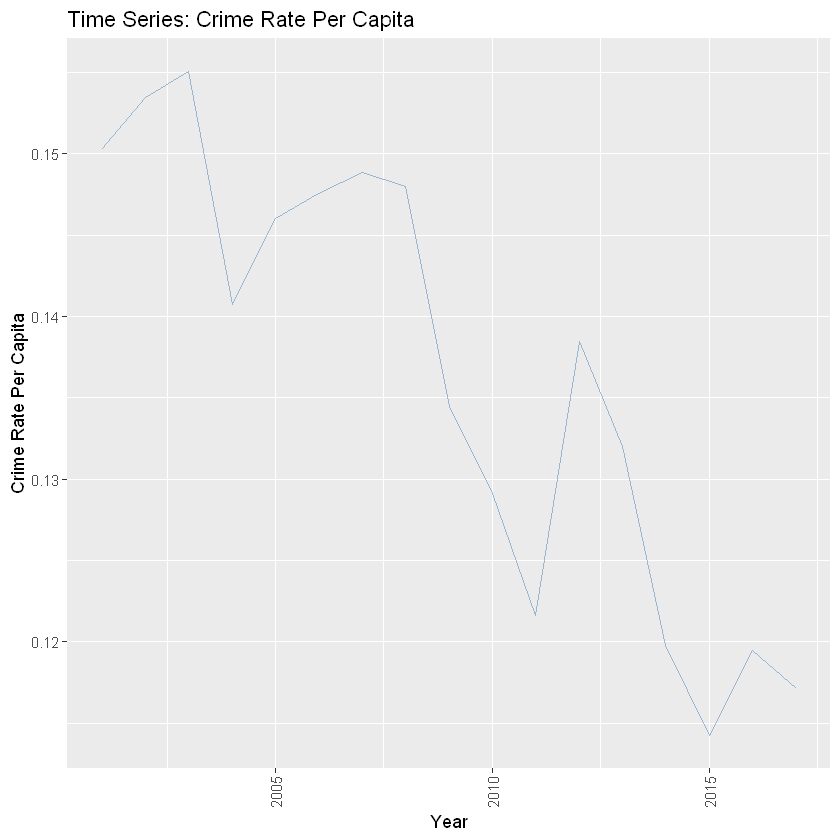

In [38]:
lga = "Albury"
x_var = "year"
y_var = "crime_rate_year_lga"
x_lab = "Year"
y_lab = "Crime Rate Per Capita"

p <- plot_time_series(joined_df_2 %>% filter(lga == !!lga), x_var, y_var, x_lab, y_lab)
p

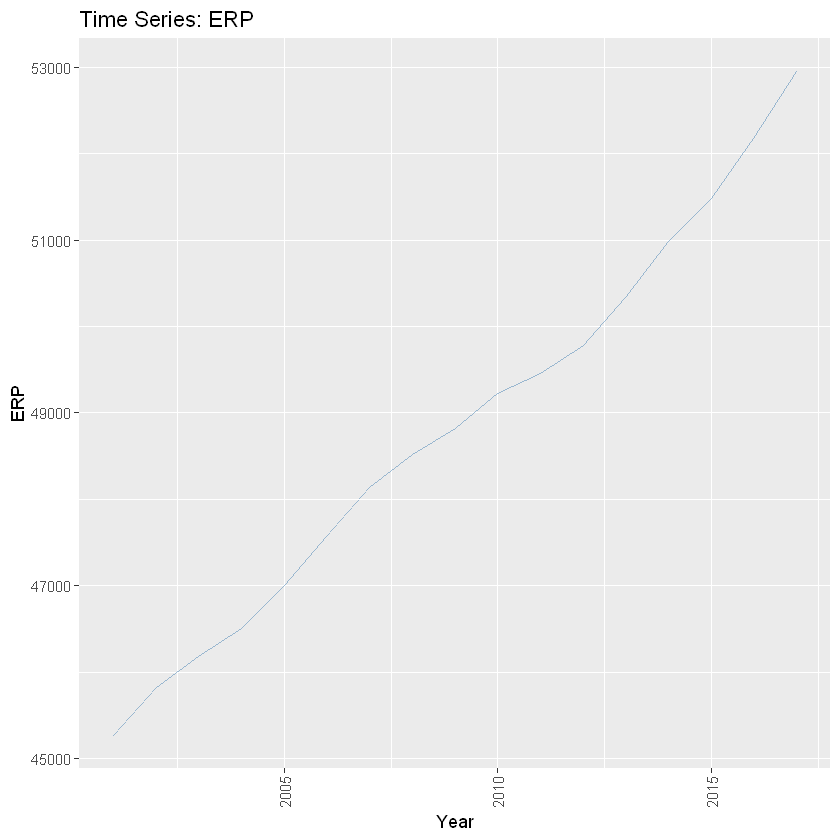

In [274]:
lga = "Albury"

x_var = "year"
y_var = "erp_lga_year"

x_lab = "Year"
y_lab = "ERP"

p <- plot_time_series(joined_df_2 %>% filter(lga == !!lga), x_var, y_var, x_lab, y_lab)
p

Warning message:
"Removed 15 rows containing missing values (geom_path)."

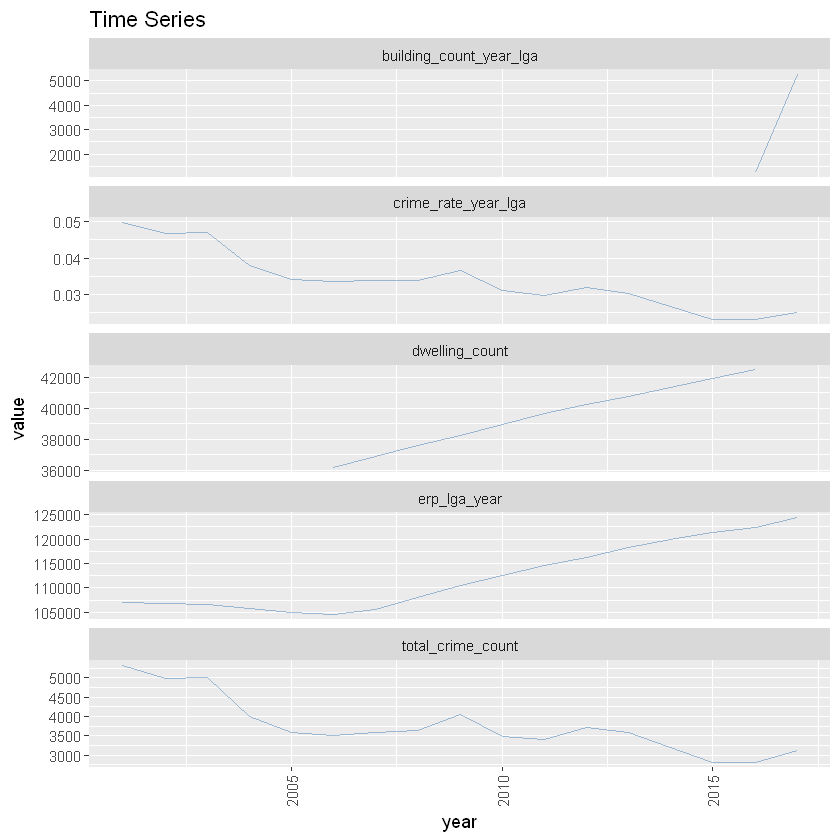

In [364]:
lga = "Ku-ring-gai"
title = paste("Time Series")

data <- joined_df_3 %>% 
    gather(key = "value_type", value = "value", -c(lga, year))

data %<>% 
    filter(lga == !!lga)

ggplot(data, aes(x = year, y = value)) +
    geom_line(, color = "steelblue", alpha = 0.5) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
    facet_wrap(~ value_type, nrow = 5, scales = "free_y") +
    ggtitle(title)



# Correlation

In [41]:
joined_df_3 %>% 
    select(-lga, -year) %>%
    corrr::correlate() %>%
    corrr::shave() %>%
    corrr::fashion()


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'



rowname,total_crime_count,erp_lga_year,crime_rate_year_lga,building_count_year_lga,dwelling_count
total_crime_count,,,,,
erp_lga_year,.84,,,,
crime_rate_year_lga,.16,-.10,,,
building_count_year_lga,.75,.76,-.01,,
dwelling_count,.88,.98,-.10,.70,


# Modelling

## Poisson Regression

In [70]:
reg_data <- joined_df_3 %>%
    select(-lga)

head(reg_data)
glimpse(reg_data)

year,total_crime_count,erp_lga_year,crime_rate_year_lga,building_count_year_lga,dwelling_count
2001,6801,45265,0.1502485,NA,NA
2002,7032,45816,0.1534835,NA,NA
2003,7160,46180,0.1550455,NA,NA
2004,6544,46505,0.1407161,NA,NA
2005,6863,47004,0.1460089,NA,NA
2006,7020,47566,0.1475844,NA,20191


Observations: 2,142
Variables: 6
$ year                    <dbl> 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2...
$ total_crime_count       <dbl> 6801, 7032, 7160, 6544, 6863, 7020, 7165, 7...
$ erp_lga_year            <int> 45265, 45816, 46180, 46505, 47004, 47566, 4...
$ crime_rate_year_lga     <dbl> 0.1502485, 0.1534835, 0.1550455, 0.1407161,...
$ building_count_year_lga <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ dwelling_count          <int> NA, NA, NA, NA, NA, 20191, 20457, 20722, 20...



Call:
glm(formula = total_crime_count ~ dwelling_count, family = poisson(link = "log"), 
    data = reg_data, offset = log(erp_lga_year))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-105.450   -12.381     0.904    13.634   254.261  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.447e+00  7.084e-04   -3454   <2e-16 ***
dwelling_count  1.365e-06  1.019e-08     134   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1389388  on 1374  degrees of freedom
Residual deviance: 1371541  on 1373  degrees of freedom
  (767 observations deleted due to missingness)
AIC: 1384687

Number of Fisher Scoring iterations: 4


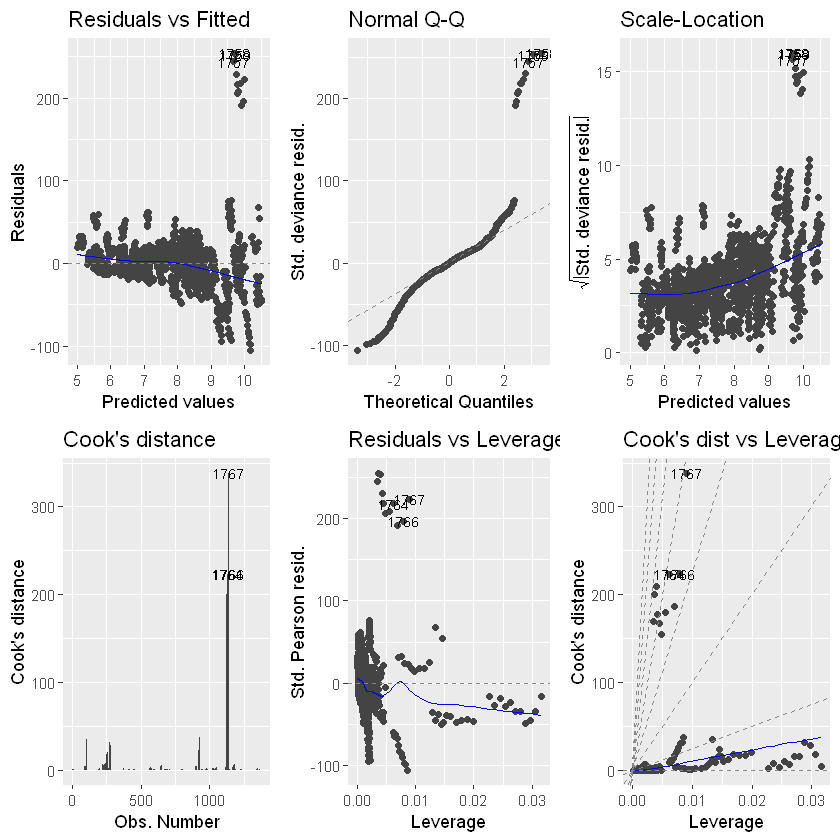

In [86]:
model <- glm(total_crime_count ~ dwelling_count,  
             offset = log(erp_lga_year), 
             family = poisson(link = "log"), 
             data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson1 <- model


Call:
glm(formula = total_crime_count ~ dwelling_count + year, family = poisson(link = "log"), 
    data = reg_data, offset = log(erp_lga_year))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-96.744  -12.415    0.867   13.271  245.416  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.389e+01  2.369e-01   100.8   <2e-16 ***
dwelling_count  1.441e-06  1.021e-08   141.0   <2e-16 ***
year           -1.310e-02  1.178e-04  -111.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1389388  on 1374  degrees of freedom
Residual deviance: 1359185  on 1372  degrees of freedom
  (767 observations deleted due to missingness)
AIC: 1372333

Number of Fisher Scoring iterations: 4


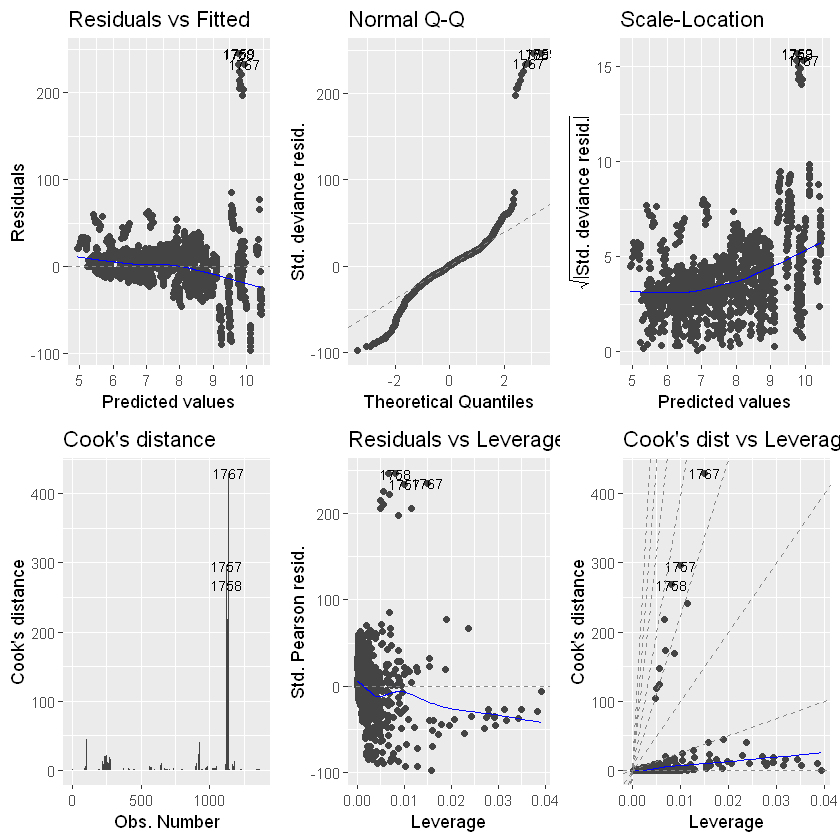

In [87]:
model <- glm(total_crime_count ~ dwelling_count + year,  
             offset = log(erp_lga_year), 
             family = poisson(link = "log"), 
             data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson2 <- model


Call:
glm(formula = total_crime_count ~ dwelling_count + year + building_count_year_lga, 
    family = poisson(link = "log"), data = reg_data, offset = log(erp_lga_year))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-110.672   -12.503     1.788    17.171   202.257  

Coefficients: (1 not defined because of singularities)
                          Estimate Std. Error  z value Pr(>|z|)    
(Intercept)             -2.594e+00  2.416e-03 -1073.63   <2e-16 ***
dwelling_count           2.074e-06  3.705e-08    55.98   <2e-16 ***
year                            NA         NA       NA       NA    
building_count_year_lga  1.973e-05  4.352e-07    45.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 152405  on 124  degrees of freedom
Residual deviance: 141765  on 122  degrees of freedom
  (2017 observations deleted due to missingness)
AIC: 142962

Number of Fis

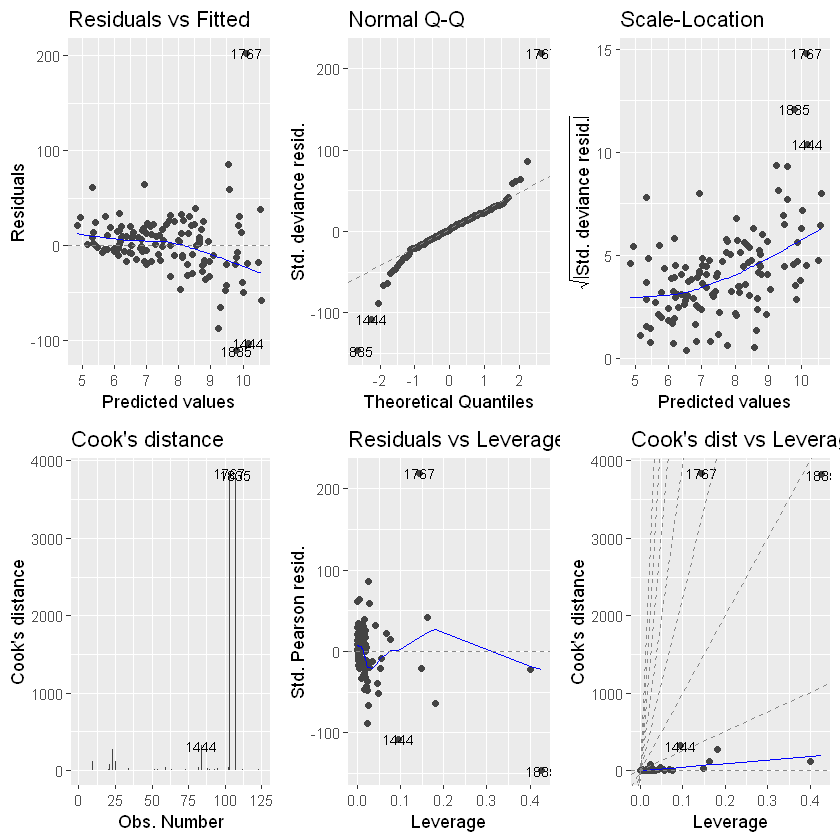

In [95]:
model <- glm(total_crime_count ~ dwelling_count + year + building_count_year_lga,  
                    offset = log(erp_lga_year), 
                    family = poisson(link = "log"), 
                    data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson3 <- model

## Quasi-Poisson Regression


Call:
glm(formula = total_crime_count ~ dwelling_count, family = "quasipoisson", 
    data = reg_data, offset = log(erp_lga_year))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-105.450   -12.381     0.904    13.634   254.261  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.447e+00  2.501e-02 -97.866  < 2e-16 ***
dwelling_count  1.365e-06  3.595e-07   3.798 0.000152 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 1245.933)

    Null deviance: 1389388  on 1374  degrees of freedom
Residual deviance: 1371541  on 1373  degrees of freedom
  (767 observations deleted due to missingness)
AIC: NA

Number of Fisher Scoring iterations: 4


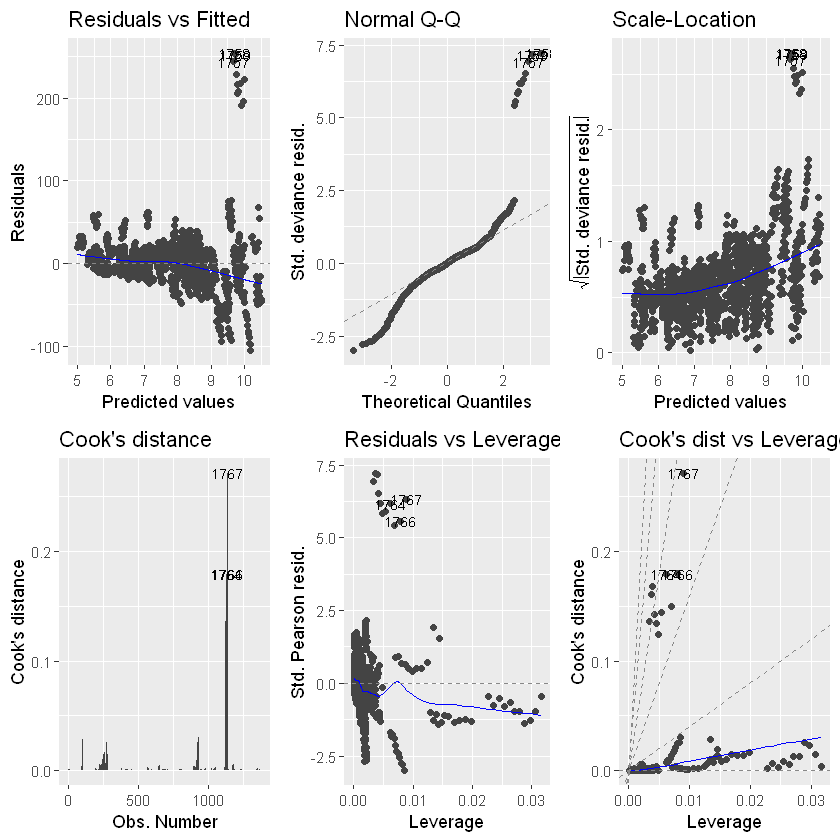

In [96]:
model <- glm(total_crime_count ~ dwelling_count,  
             offset = log(erp_lga_year), 
             family = "quasipoisson", 
             data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson4 <- model


Call:
glm(formula = total_crime_count ~ dwelling_count + year, family = "quasipoisson", 
    data = reg_data, offset = log(erp_lga_year))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-96.744  -12.415    0.867   13.271  245.416  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.389e+01  8.324e+00   2.870  0.00417 ** 
dwelling_count  1.441e-06  3.589e-07   4.014  6.3e-05 ***
year           -1.310e-02  4.140e-03  -3.164  0.00159 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 1234.541)

    Null deviance: 1389388  on 1374  degrees of freedom
Residual deviance: 1359185  on 1372  degrees of freedom
  (767 observations deleted due to missingness)
AIC: NA

Number of Fisher Scoring iterations: 4


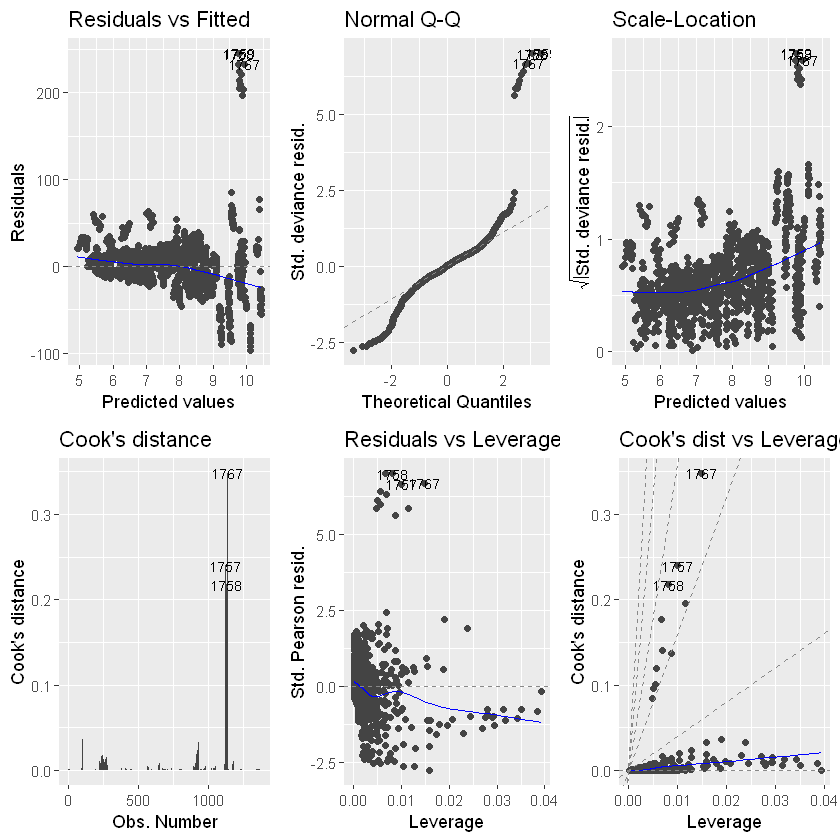

In [97]:
model <- glm(total_crime_count ~ dwelling_count + year,  
             offset = log(erp_lga_year), 
             family = "quasipoisson", 
             data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson5 <- model


Call:
glm(formula = total_crime_count ~ dwelling_count + year + building_count_year_lga, 
    family = poisson(link = "log"), data = reg_data, offset = log(erp_lga_year))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-110.672   -12.503     1.788    17.171   202.257  

Coefficients: (1 not defined because of singularities)
                          Estimate Std. Error  z value Pr(>|z|)    
(Intercept)             -2.594e+00  2.416e-03 -1073.63   <2e-16 ***
dwelling_count           2.074e-06  3.705e-08    55.98   <2e-16 ***
year                            NA         NA       NA       NA    
building_count_year_lga  1.973e-05  4.352e-07    45.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 152405  on 124  degrees of freedom
Residual deviance: 141765  on 122  degrees of freedom
  (2017 observations deleted due to missingness)
AIC: 142962

Number of Fis

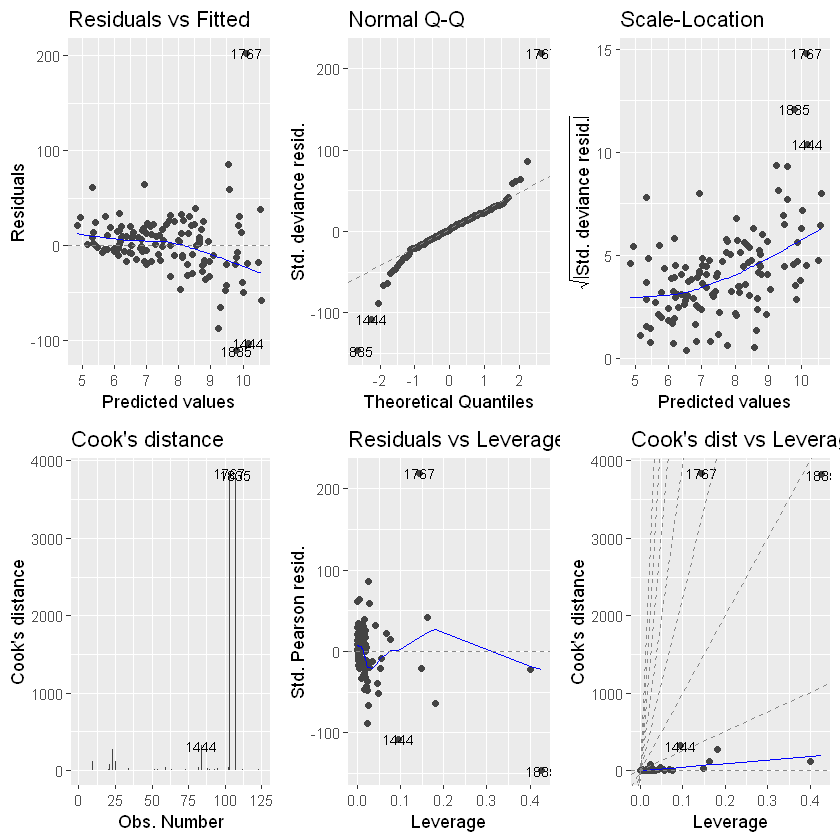

In [100]:
model <- glm(total_crime_count ~ dwelling_count + year + building_count_year_lga,  
                    offset = log(erp_lga_year), 
                    family = poisson(link = "log"), 
                    data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson6 <- model

## Negative Binomial Regression


Call:
glm.nb(formula = total_crime_count ~ dwelling_count, data = reg_data, 
    init.theta = 2.372813426, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9015  -0.9200  -0.1291   0.4853   2.0120  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    7.020e+00  2.262e-02  310.37   <2e-16 ***
dwelling_count 4.133e-05  6.385e-07   64.74   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(2.3728) family taken to be 1)

    Null deviance: 5530.7  on 1374  degrees of freedom
Residual deviance: 1469.9  on 1373  degrees of freedom
  (767 observations deleted due to missingness)
AIC: 24143

Number of Fisher Scoring iterations: 1


              Theta:  2.3728 
          Std. Err.:  0.0851 

 2 x log-likelihood:  -24137.1650 

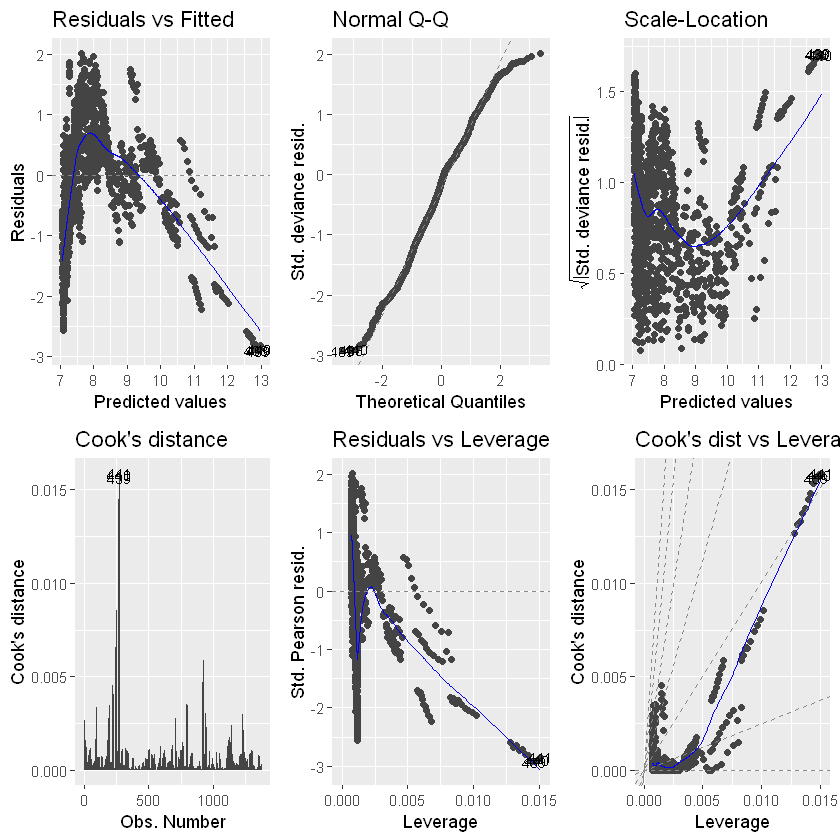

In [104]:
model <- glm.nb(total_crime_count ~ dwelling_count,  
                data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson7 <- model


Call:
glm.nb(formula = total_crime_count ~ dwelling_count + year, data = reg_data, 
    init.theta = 2.389987122, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8819  -0.9129  -0.1267   0.4783   2.0666  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.427e+01  1.110e+01   3.986 6.71e-05 ***
dwelling_count  4.139e-05  6.365e-07  65.032  < 2e-16 ***
year           -1.852e-02  5.522e-03  -3.354 0.000795 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(2.39) family taken to be 1)

    Null deviance: 5570.7  on 1374  degrees of freedom
Residual deviance: 1469.3  on 1372  degrees of freedom
  (767 observations deleted due to missingness)
AIC: 24134

Number of Fisher Scoring iterations: 1


              Theta:  2.3900 
          Std. Err.:  0.0857 

 2 x log-likelihood:  -24125.9340 

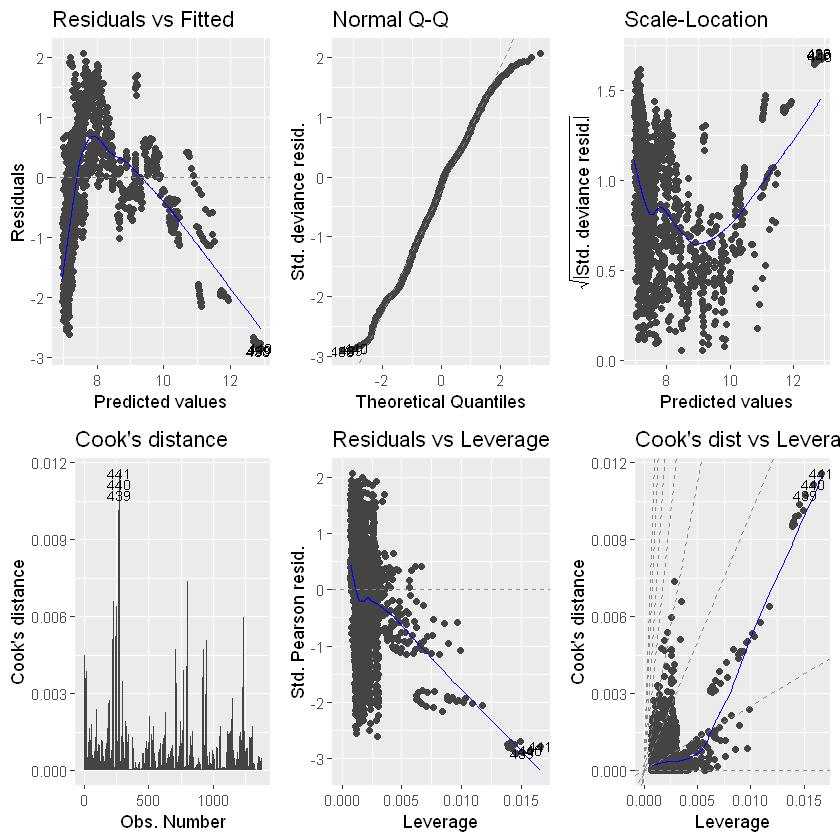

In [105]:
model <- glm.nb(total_crime_count ~ dwelling_count + year,  
                data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson8 <- model


Call:
glm.nb(formula = total_crime_count ~ dwelling_count + year + 
    building_count_year_lga, data = reg_data, init.theta = 2.345017348, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8557  -0.9136  -0.1534   0.4748   1.8419  

Coefficients: (1 not defined because of singularities)
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              6.941e+00  7.576e-02   91.61   <2e-16 ***
dwelling_count           4.328e-05  2.816e-06   15.37   <2e-16 ***
year                            NA         NA      NA       NA    
building_count_year_lga -5.083e-05  3.852e-05   -1.32    0.187    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(2.345) family taken to be 1)

    Null deviance: 537.05  on 124  degrees of freedom
Residual deviance: 133.72  on 122  degrees of freedom
  (2017 observations deleted due to missingness)
AIC: 2196

Number of Fisher Scoring it

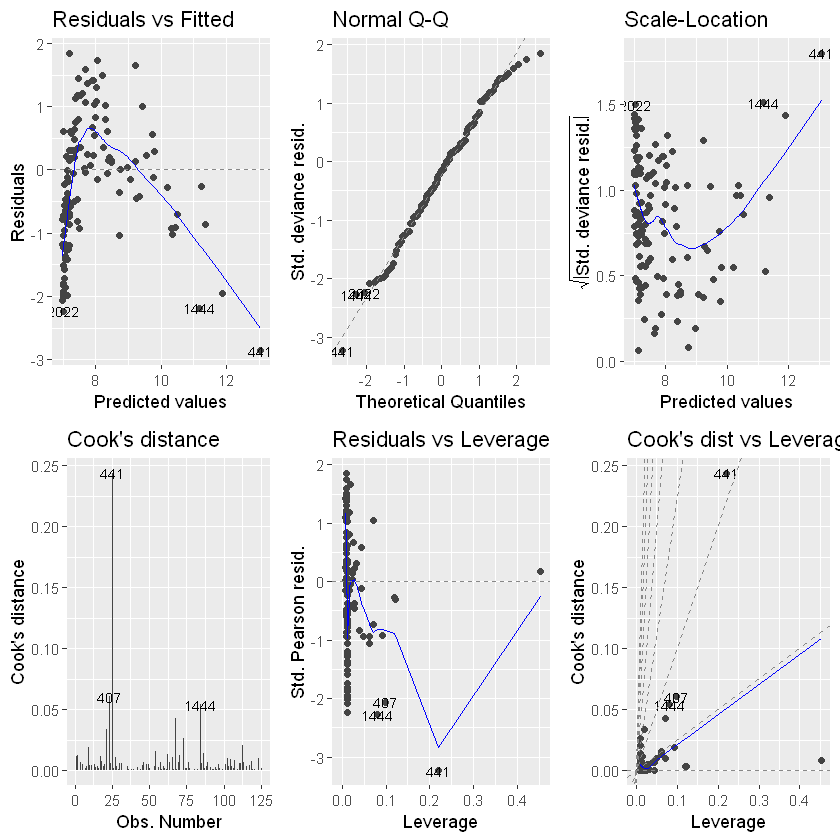

In [106]:
model <- glm.nb(total_crime_count ~ dwelling_count + year + building_count_year_lga,  
                data = reg_data)

summary(model)
autoplot(model, which = 1:6, ncol = 3, label.size = 3)

glm_poisson9 <- model